### k-means

1. centroid(중심점)를 생성
2. 생성한 중심점과 각 데이터 사이의 거리를 계산하여 가까운 데이터들끼리 하나의 클러스터로 묶음
3. 클러스터에 속해있는 데이터의 중심으로 중심점 위치 이동(평균값 사용)
4. 새로운 중심점을 기준으로 다시 데이터 거리를 계산하여 클러스터 재형성
5. 새롭게 형성된 클러스터의 중심으로 중심점 이동

- 장점
    - 데이터 사이 거리만 구할 수 있다면 쉽게 사용할 수 있음
    - 수식이 쉬워 이해와 해석이 용이함

- 단점
    - 최적의 클러스터 개수인 k를 정하기 어려움
    - 이상치에 영향을 많이 받음
    - 초기 중심점이 어디에 위치하는지에 따라 결과가 달라짐

- k-means++: 전략적으로 초기 중심점 위치를 찾아주는 모델
```python
from sklearn.cluster import KMeans
model = KMeans(n_clusters=k, init='k-means++')
```

In [19]:
import pandas as pd
from sklearn.cluster import KMeans
import seaborn as sns

scaled_df = pd.read_csv('data/scaled_data.csv', index_col=[0])

# 모델 선언(클러스터 개수 4개)
# random_state=123: 반복 실행해도 같은 결과값
model = KMeans(n_clusters=4, random_state=123)

# 데이터 학습
model.fit(scaled_df)

# 데이터마다 부여된 클러스터 라벨 확인
scaled_df['label'] = model.predict(scaled_df)

scaled_df['label'].value_counts()

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


label
0    97
3    68
2    31
1    29
Name: count, dtype: int64

<Axes: xlabel='total_buy_cnt', ylabel='total_price'>

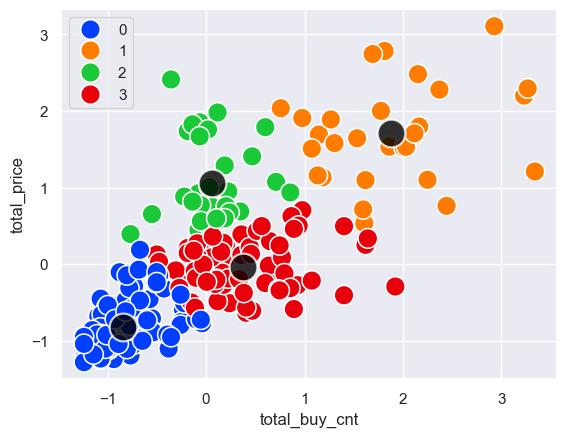

In [20]:
# 각 군집의 중심점
centers = model.cluster_centers_

sns.scatterplot(x=scaled_df['total_buy_cnt'], y=scaled_df['total_price'], hue=scaled_df['label'], s=200, palette='bright')
sns.scatterplot(x=centers[:,0], y=centers[:,1], color='black', alpha=0.8, s=400)

### Elbow Method

- 최적의 클러스터 개수를 구하기 위한 메서드

1. 서로 다른 k값 여러 개로 모델을 만듦
2. 각각의 inertia 값을 비교

- 최적의 k값은 inertia가 충분히 작으면서도 분석 목적에 적합해야 함
- 보통 시각화한 그래프의 기울기가 급격하게 줄어드는 구간으로 정의

<Axes: >

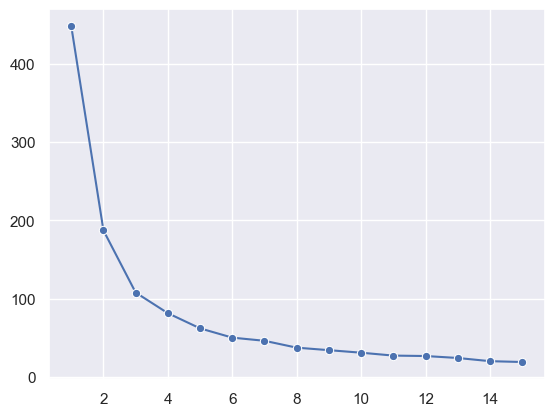

In [23]:
import warnings
warnings.filterwarnings("ignore", message="KMeans is known to have a memory leak")

import seaborn as sns
%matplotlib inline

inertias = []

for k in range(1, 16):
    model = KMeans(n_clusters=k, random_state=123)
    model.fit(scaled_df)
    inertias.append(model.inertia_)

# 시각화
sns.set_theme(style="darkgrid")
sns.lineplot(x=range(1,16), y=inertias, marker='o')


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


<Axes: xlabel='total_buy_cnt', ylabel='total_price'>

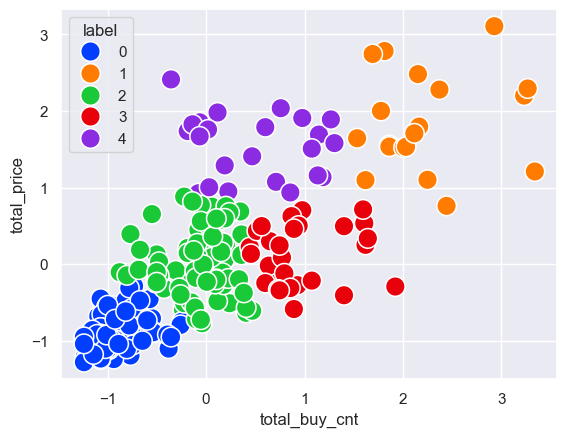

In [22]:
model = KMeans(n_clusters=5, random_state=123)
model.fit(scaled_df)

scaled_df['label'] = model.predict(scaled_df)

sns.scatterplot(x= scaled_df['total_buy_cnt'], y= scaled_df['total_price'], hue= scaled_df['label'], s=200, palette='bright')

#### 이외 클러스터링 기법

1. 계층 기반 클러스터링 (Buttom-up)
    - 클러스터를 층으로 쌓아가며 클러스터링
    - 가장 가까운 데이터 쌍부터 차례로 묶어가며 모든 데이터가 하나의 클러스터로 묶일 때까지 반복(덴드로그램)
    - 데이터 간 관계 파악 용이
    - 원하는 수의 클러스터로 간단하게 구분 가능

- 장점
    - 클러스터 개수를 미리 가정하지 않아도 됨
    - 클러스터 개수를 몇 개로 해야 할지 모를 때 유용

- 단점
    - 데이터 거리를 반복 계산해야 함
    - 학습 속도가 느리고 대용량 데이터에 적용이 어려움

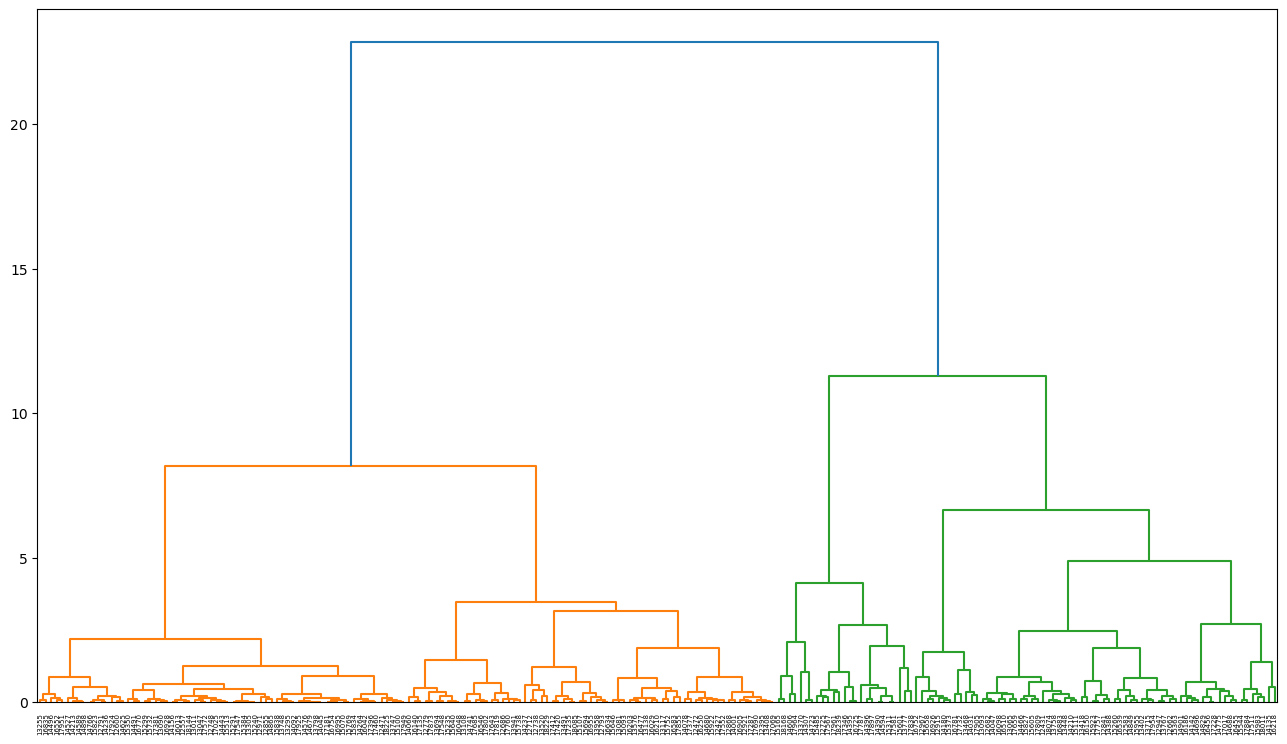

In [24]:
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree
import matplotlib.pyplot as plt

#모델 학습
model = linkage(scaled_df, "ward")

labelList = scaled_df.index 

# 덴드로그램 사이즈와 스타일 조정
plt.figure(figsize=(16,9))
plt.style.use("default")

dendrogram(model, labels=labelList)
plt.show()


<Axes: xlabel='total_price', ylabel='total_buy_cnt'>

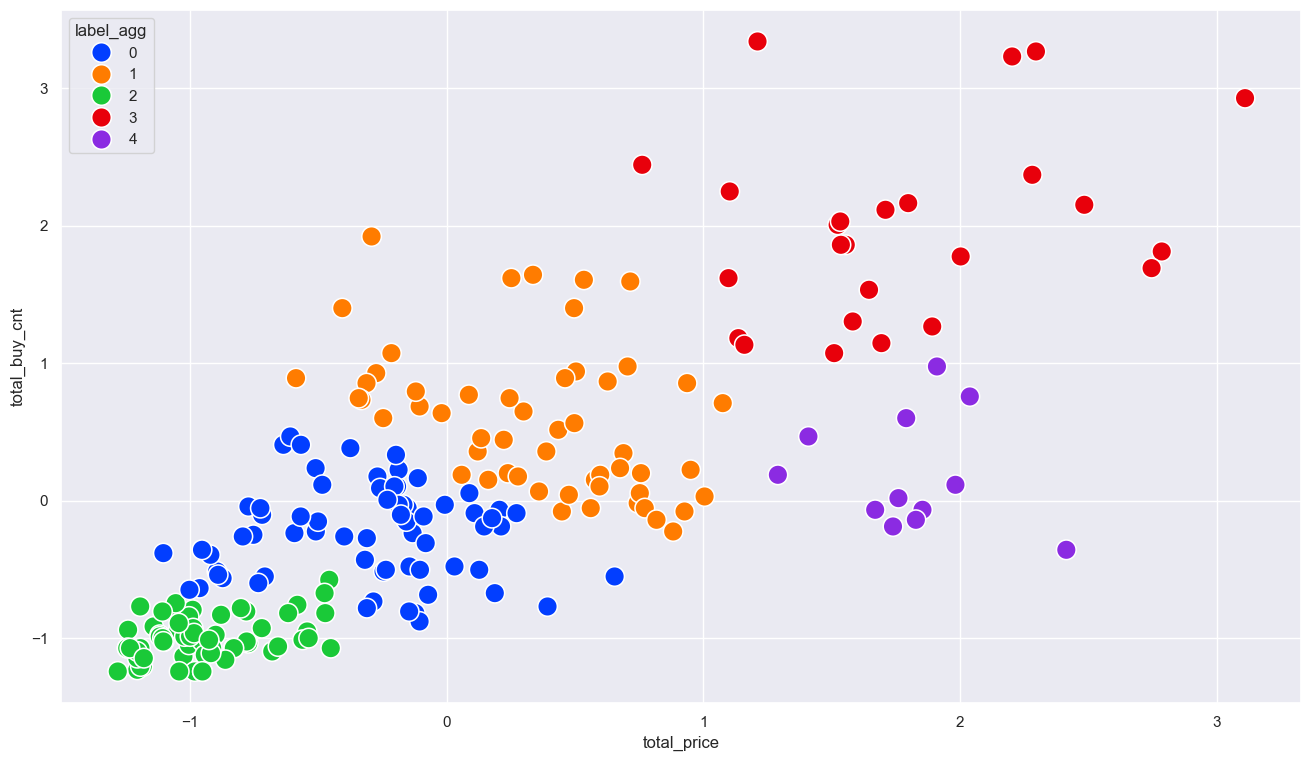

In [26]:
cluster_num = 5

# 고객별 클러스터 라벨 구하기
scaled_df['label_agg'] = cut_tree(model, cluster_num)

sns.set_theme(style="darkgrid",
        rc = {'figure.figsize':(16,9)})

# 계층적 클러스터링
sns.scatterplot(x=scaled_df['total_price'], y=scaled_df['total_buy_cnt'], hue=scaled_df['label_agg'], s=200, palette='bright')

2. 밀도 기반 클러스터링 (DBSCAN)
    - 밀도가 높은 부분을 같은 클러스터로 묶음
    - 기하학적 형태의 데이터 클러스터링에 효과적
    - 고차원 데이터일수록 밀도 계산이 어렵고 학습속도가 느려짐

    1. 특정 데이터에서 지정한 반경 내 몇 개의 데이터가 포함되는지 탐색
    2. 최소 데이터 수가 포함되면 하나의 클러스터로 묶음
        - 클러스터 반경이 겹치는 경우 하나로 묶음
    3. 조건에 만족하지 못하고 클러스터에 포함되지 못한 데이터는 이상치로 판단하여 제거

<Axes: xlabel='0', ylabel='1'>

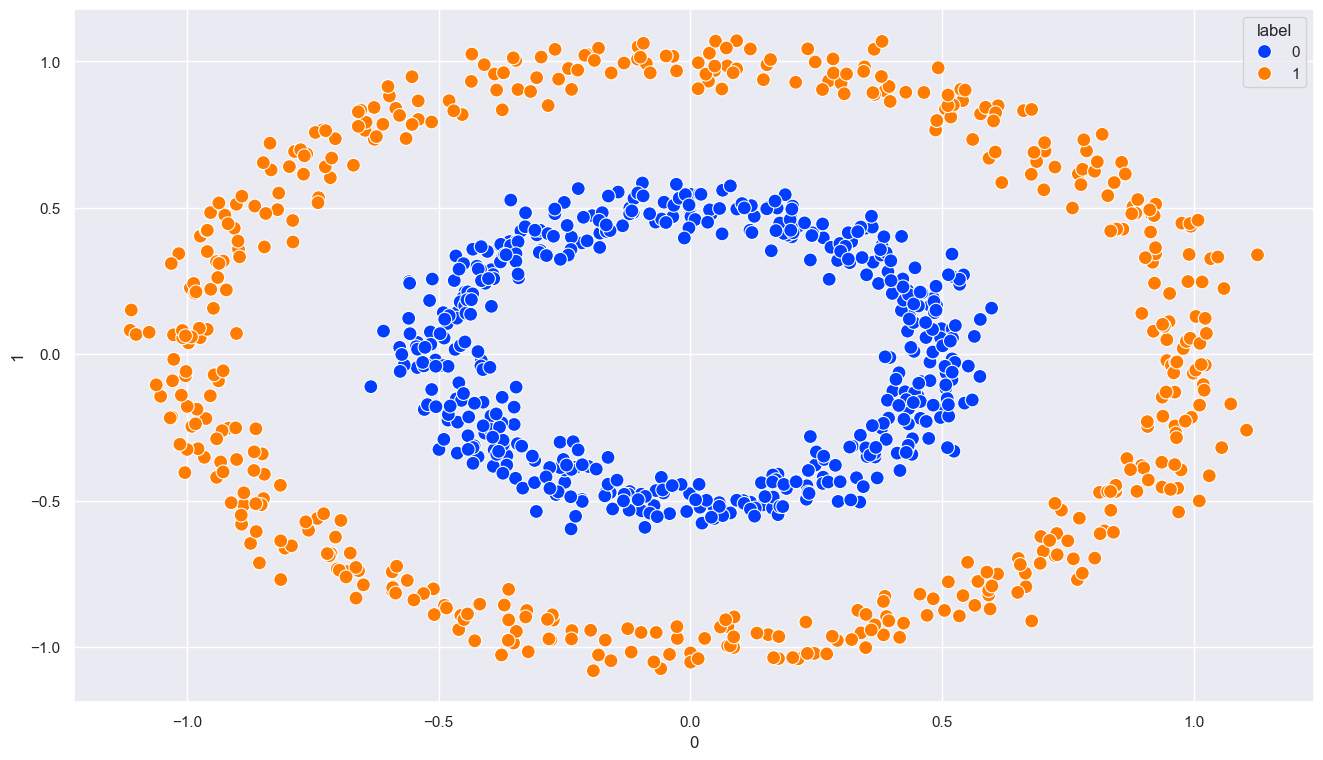

In [27]:
from sklearn.datasets import make_circles
from sklearn.cluster import DBSCAN

# 원형 데이터 클러스터링
# noise: 잡음의 크기(0이면 정확한 원)
X, y = make_circles(n_samples=1000, shuffle=True, noise=0.05, random_state=0, factor=0.5)
df = pd.DataFrame(X)

# DBSCAN 모델 학습
eps = 0.1  # 직경
min_samples = 5  # 최소 데이터 갯수

# 모델 학습
model =  DBSCAN(eps=eps, min_samples=min_samples)
model.fit(df)

# 각 데이터별로 어떤 클러스터에 할당되었는지 라벨 붙이기
df['label'] = model.labels_

# 시각화
sns.set_style("darkgrid")
plt.figure(figsize=(16,9))
sns.scatterplot(x=df[0], y=df[1], hue=df['label'], marker='o', s=100, palette="bright")

3. 분포 기반 클러스터링 (GMM)
    - 각 클러스터가 정규분포를 따른다고 가정
    - 특정 데이터가 포함될 확률이 가장 높은 분포의 클러스터가 무엇인지 찾음
    - 데이터가 클러스터별로 풍심으로 표현하면서 분산의 구조도 함께 띄고 있는 데이터에 효과적(타원형 분포)
    - 사전에 임의로 클러스터 개수를 설정해야 하기 때문에 그 값에 따라 결과가 달라질 수 있음
    - 데이터의 수가 충분히 많아야 적용 가능함
    - 정규 분포가 나올 수 없는 범주형 데이터에는 적용 불가능

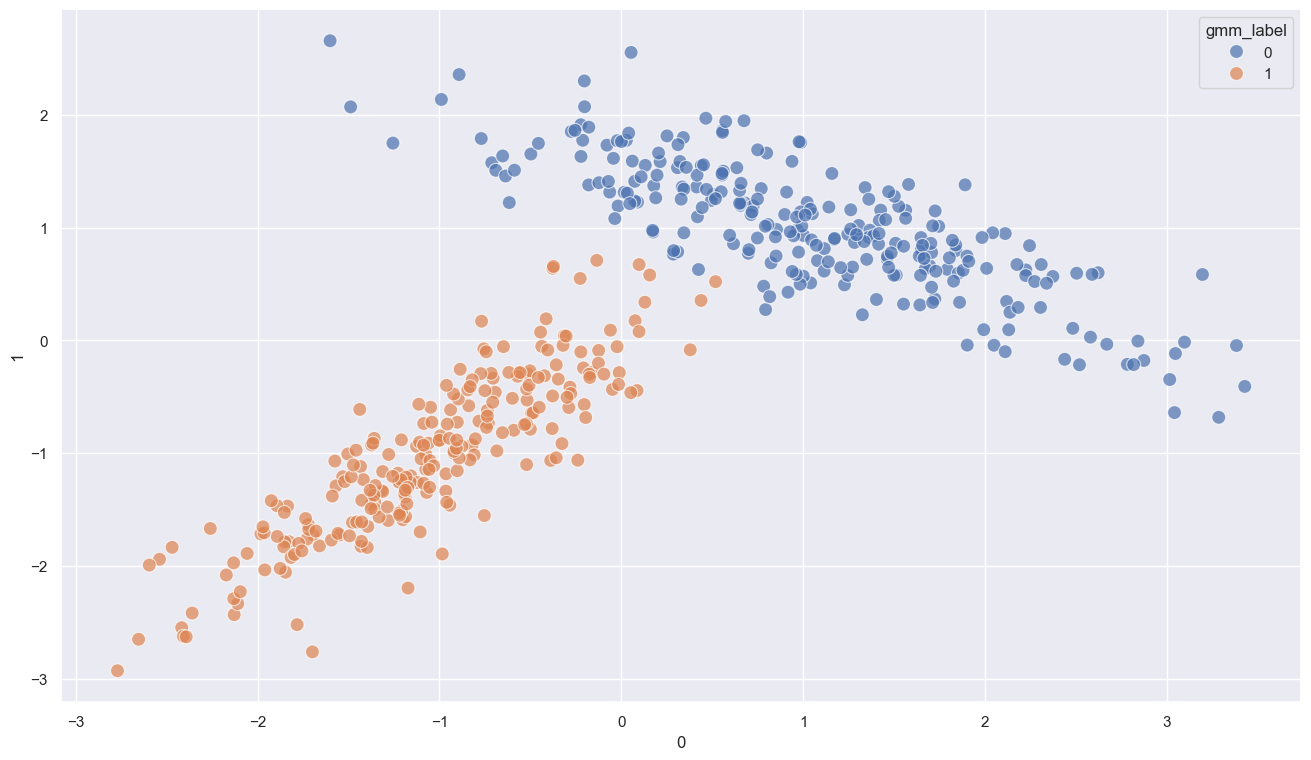

In [28]:
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_classification

# 데이터 생성
# n_samples: 샘플 데이터 개수
X, y = make_classification(n_samples=500, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=6)
df = pd.DataFrame(X)

n_components = 2  # 분포 개수
random_state = 123  # 모델 고정

model = GaussianMixture(n_components=n_components, random_state=random_state)
model.fit(df)
df['gmm_label'] = model.predict(df)

# 시각화
sns.set_style("darkgrid")
plt.figure(figsize=(16,9))
sns.scatterplot(x=df[0], y=df[1], hue=df['gmm_label'], alpha=0.7, s=100)
plt.show()